**Synthesize unitary operations**

In [1]:
import numpy as np
from qiskit import QuantumCircuit
 
U = 0.5 * np.array([
    [1, 1, 1, 1],
    [-1, 1, -1, 1],
    [-1, -1, 1, 1],
    [-1, 1, 1, -1]
])
 
circuit = QuantumCircuit(2)
circuit.unitary(U, circuit.qubits)

**Re-synthesis for circuit optimization**

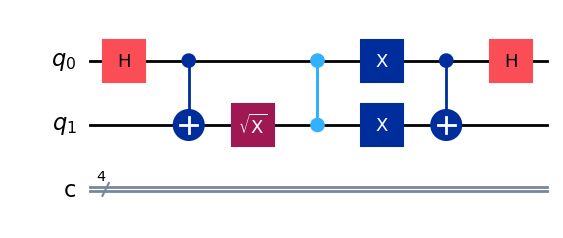

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
 
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
 
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.sx(qreg_q[1])
circuit.cz(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[1])
circuit.x(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.draw("mpl")

In [3]:
from qiskit.quantum_info import Operator
 
# compute unitary matrix of circuit
U = Operator(circuit)
 
# re-synthesize
better_circuit = QuantumCircuit(2)
better_circuit.unitary(U, range(2))
better_circuit.decompose().draw()

global phase: 0.84516
       ┌───────────────┐         ┌────────────────┐ 
q_0: ──┤ U(π/2,π/2,-π) ├────■────┤ U(π/2,-π,-π/2) ├─
     ┌─┴───────────────┴─┐┌─┴─┐┌─┴────────────────┴┐
q_1: ┤ U(0.11953,-π/2,0) ├┤ X ├┤ U(π/2,-1.6903,-π) ├
     └───────────────────┘└───┘└───────────────────┘